In [5]:
import qutip

In [28]:
import numpy as np
import matplotlib.pyplot as plt

E_J = 20e9
w = 5.5e9
anharm = -200e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# potential energies of the QHO & transmon
U_QHO = 0.5*E_J*phis**2
U_QHO = U_QHO/w
U_transmon = (E_J-E_J*np.cos(phis))
U_transmon = U_transmon/w

In [29]:
from qutip import destroy
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

In [30]:
print(E_transmon)

[0.00e+00 5.50e+09 1.08e+10 1.59e+10 2.08e+10 2.55e+10 3.00e+10 3.43e+10
 3.84e+10 4.23e+10]


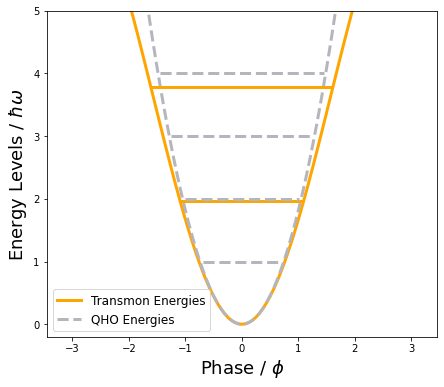

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(7,6))

axes.plot(phis, U_transmon, '-', color='orange', linewidth=3.0)
axes.plot(phis, U_QHO, '--', color='#b5b5bd', linewidth=3.0)

for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='#b5b5bd', linewidth=3.0)
    
axes.set_xlabel('Phase / $\phi$', fontsize=18)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=18)
axes.set_ylim(-0.2,5)

qho_label.set_label('QHO Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=3, fontsize=12)

In [8]:
import sys
sys.path.append('D:/Labber/Script')
import Labber

ModuleNotFoundError: No module named 'Labber._include38._version'

In [3]:
f = Labber.LogFile('Z:/KianG/20220322_DC_Chip2_Ta/2022/05/Data_0531/NW4_Vbias_gateup_sweepup.hdf5')
d = f.getEntry(0) 
for (channel, value) in d.items(): 
    print(channel, ":", value)

AttributeError: module 'Labber' has no attribute 'LogFile'

In [ ]:
# The code for extraction of Ic
f = Labber.LogFile('Z:/KianG/20220711_Ta_DCChip6/2022/07/Data_0720/NW2_currentbias_finer_10reps_sweepup_gatedown.hdf5')
period = 41
R_1 = np.zeros([26, 301])
I_C = np.zeros(26)
for entry in range(26):
    (Ibias, Vdrop) = f.getTraceXY(entry=entry)
    Iac = f.getData('Lockin-2 - Value', entry=entry)  # read data
    R_nw = ((abs(Vdrop/1e3)/(abs(Iac)/1e6)))
    R_nw = np.clip(R_nw, a_min=None, a_max=50e3)
    R_1[entry] = R_nw
    R_nw[125:175] = 0
    R_nw[0:20], R_nw[280:300] = 0, 0
    peaks, _ = find_peaks(R_nw, prominence=50, distance=100)
    # plt.plot(Ibias, Vdrop)
    # plt.scatter(entry, Ibias[peaks[0]]*1e3)
    # plt.ylabel('$I_C$ / nA')
    I_C[entry] = peaks[1]

def heatmap2d(arr: np.ndarray):
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.imshow(arr, cmap='RdBu_r', aspect='auto', interpolation='nearest')
    cb = plt.colorbar(ticks=[0, 25000, 50000])
    cb.set_label(label='Resistance / $k\Omega$', fontsize=14)

#%% The extraction of Ic
    
heatmap2d(R_1.T)
# plt.scatter(range(26), I_C, c='w', s=30)
plt.plot(range(26), I_C, c='#aabf0a', linewidth=3)
print(np.arange(0, 240, dtype='float') * -1 / 100)
plt.xticks([0, 13, 25], [0, -0.78, -1.5])
plt.yticks([0, 75, 150, 225, 300], [-20, -10, 0, 10, 20])
plt.xlabel('$V_{gate}$ / V', fontsize=16)
plt.ylabel('$I_{bias}$ / nA', fontsize=16)
plt.title('Repeatability $I_C$ extraction', fontsize=16)

plt.show()

In [ ]:
# The code for all Ic plot
f = Labber.LogFile('Z:/KianG/20220711_Ta_DCChip6/2022/07/Data_0720/NW2_currentbias_finer_10reps_sweepup_gatedown.hdf5')
period = 41
R_1 = np.zeros([26, 301])
I_C = np.zeros([10, 26])
for rep in range(10):
    for ent in range(26):
        entry = ent + 41 * rep
        (Ibias, Vdrop) = f.getTraceXY(entry=entry)
        Iac = f.getData('Lockin-2 - Value', entry=entry)  # read data
        R_nw = ((abs(Vdrop/1e3)/(abs(Iac)/1e6)))
        R_nw = np.clip(R_nw, a_min=None, a_max=50e3)
        R_nw[115:185] = 0
        R_nw[0:20], R_nw[280:300] = 0, 0
        peaks, _ = find_peaks(R_nw, prominence=50, distance=100)
        # plt.plot(Ibias, Vdrop)
        # plt.scatter(entry, Ibias[peaks[0]]*1e3)
        # plt.ylabel('$I_C$ / nA')
        I_C[rep][ent] = Ibias[peaks[1]] * 1e3 + rep
    plt.plot(range(26), I_C[rep])
plt.xlabel('$V_{gate}$ / V', fontsize=16)
plt.xlim(0, 25)
plt.xticks([0, 13, 25], [0, -0.78, -1.5], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('$I_{bias}$ / nA', fontsize=16)
plt.grid(linestyle='--')
plt.title('10 Repetitions on $I_C$ extraction', fontsize=16)
plt.show()


def heatmap2d(arr: np.ndarray):
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.imshow(arr, cmap='RdBu_r', aspect='auto', interpolation='nearest')
    cb = plt.colorbar(ticks=[0, 25000, 50000])
    cb.set_label(label='Resistance / $k\Omega$', fontsize=14)

Text(0.5, 1.0, 'Andreev bound state with different transmission')

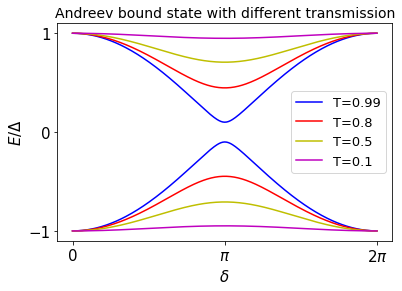

In [44]:
import numpy as np
import matplotlib.pyplot as plt
phi = np.arange(0, 2*3.1415926, 0.02)
E_ABS = np.zeros((len(phi), 8))

i=0
for T in [0.99, 0.8, 0.5, 0.1]:
    E_ABS[:,i] = np.sqrt(1-T*np.sin(phi/2)**2)
    E_ABS[:,i+1] = -np.sqrt(1-T*np.sin(phi/2)**2)
    i += 2

plt.plot(phi, E_ABS[:, 0], c='b', label='T=0.99')
plt.plot(phi, E_ABS[:, 1], c='b')
plt.plot(phi, E_ABS[:, 2], c='r')
plt.plot(phi, E_ABS[:, 3], c='r', label='T=0.8')
plt.plot(phi, E_ABS[:, 4], c='y')
plt.plot(phi, E_ABS[:, 5], c='y', label='T=0.5')
plt.plot(phi, E_ABS[:, 6], c='m')
plt.plot(phi, E_ABS[:, 7], c='m', label='T=0.1')
plt.legend(prop={'size': 13})
plt.yticks([-1, 0, 1], size=15)
plt.ylabel('$E/\Delta$', family='serif', size=15)
plt.xticks([0, 3.1415926, 2*3.1415926], ['0','$\pi$', '$2\pi$'], size=15)
plt.xlabel('$\delta$', size=15)
plt.title('Andreev bound state with different transmission', size = 14)
# plt.tight_layout()